In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("Nouba 46 sales 2017-2023.xlsx")
df.head()

,Unnamed: 0,Amount
0,2017-10-01,2500.000000
1,2017-11-01,2489.201415
2,2017-12-01,2466.459091
3,2018-01-01,2409.274590
4,2018-02-01,2393.684111


In [3]:
df.tail()

,Unnamed: 0,Amount
67,2023-05-01,2011.398316
68,2023-06-01,2018.452000
69,2023-07-01,1928.027465
70,2023-08-01,2013.857120
71,2023-09-01,2162.040378


In [4]:
df.columns = ["Months", "Sales"]
df.head()

,Months,Sales
0,2017-10-01,2500.000000
1,2017-11-01,2489.201415
2,2017-12-01,2466.459091
3,2018-01-01,2409.274590
4,2018-02-01,2393.684111


In [5]:
df.dropna()
df.head()

,Months,Sales
0,2017-10-01,2500.000000
1,2017-11-01,2489.201415
2,2017-12-01,2466.459091
3,2018-01-01,2409.274590
4,2018-02-01,2393.684111


In [6]:
df.describe()

,Months,Sales
count,72,72.000000
mean,2020-09-15 08:20:00,1966.357026
min,2017-10-01 00:00:00,0.000000
25%,2019-03-24 06:00:00,1717.578409
50%,2020-09-16 00:00:00,1915.517574
75%,2022-03-08 18:00:00,2320.395267
max,2023-09-01 00:00:00,2812.891638
std,NaN,416.187232


In [7]:
df.set_index('Months', inplace=True)

In [8]:
df.head()

,Sales
Months,
2017-10-01,2500.000000
2017-11-01,2489.201415
2017-12-01,2466.459091
2018-01-01,2409.274590
2018-02-01,2393.684111


# VISUALIZE THE DATA

<Axes: xlabel='Months'>

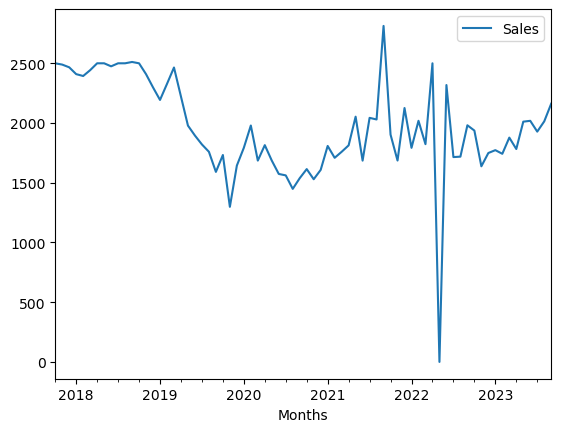

In [9]:
df.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
test_result = adfuller(df['Sales'])

In [12]:
def adfuller_test(sales):
    results = adfuller(sales)
    labels = ['ADF test statistic', 'p-value', 'No of lags used', 'No of observations used']
    for value, label in zip(results, labels):
        print(label +' : '+ str(value))
    if results[1] <= 0.05:
        print("It is stationary")
    else:
        print("It is not stationary")

In [13]:
adfuller_test(df['Sales'])

ADF test statistic : -2.2734923249939487
p-value : 0.1806597768525937
No of lags used : 2
No of observations used : 69
It is not stationary


# DIFFERENCING

In [14]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df.head(10)

,Sales,Sales First Difference
Months,,
2017-10-01,2500.000000,NaN
2017-11-01,2489.201415,-10.798585
2017-12-01,2466.459091,-22.742324
2018-01-01,2409.274590,-57.184501
2018-02-01,2393.684111,-15.590479
2018-03-01,2442.444741,48.760630
2018-04-01,2500.000000,57.555259
2018-05-01,2500.000000,0.000000
2018-06-01,2474.655109,-25.344891


In [15]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(2)
df.head(20)

,Sales,Sales First Difference,Seasonal First Difference
Months,,,
2017-10-01,2500.000000,NaN,NaN
2017-11-01,2489.201415,-10.798585,NaN
2017-12-01,2466.459091,-22.742324,-33.540909
2018-01-01,2409.274590,-57.184501,-79.926824
2018-02-01,2393.684111,-15.590479,-72.774980
2018-03-01,2442.444741,48.760630,33.170151
2018-04-01,2500.000000,57.555259,106.315889
2018-05-01,2500.000000,0.000000,57.555259
2018-06-01,2474.655109,-25.344891,-25.344891


In [16]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF test statistic : -5.445435075520074
p-value : 2.7171911842455546e-06
No of lags used : 3
No of observations used : 66
It is stationary


<Axes: xlabel='Months'>

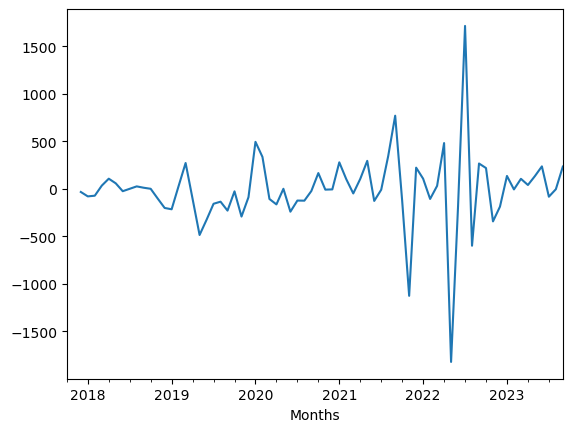

In [17]:
df['Seasonal First Difference'].plot()

# Auto Regressive model

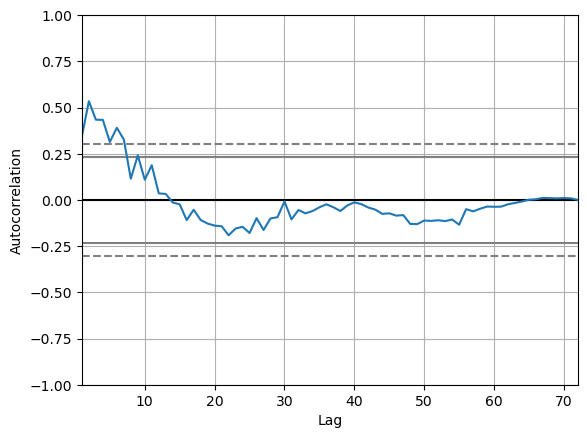

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

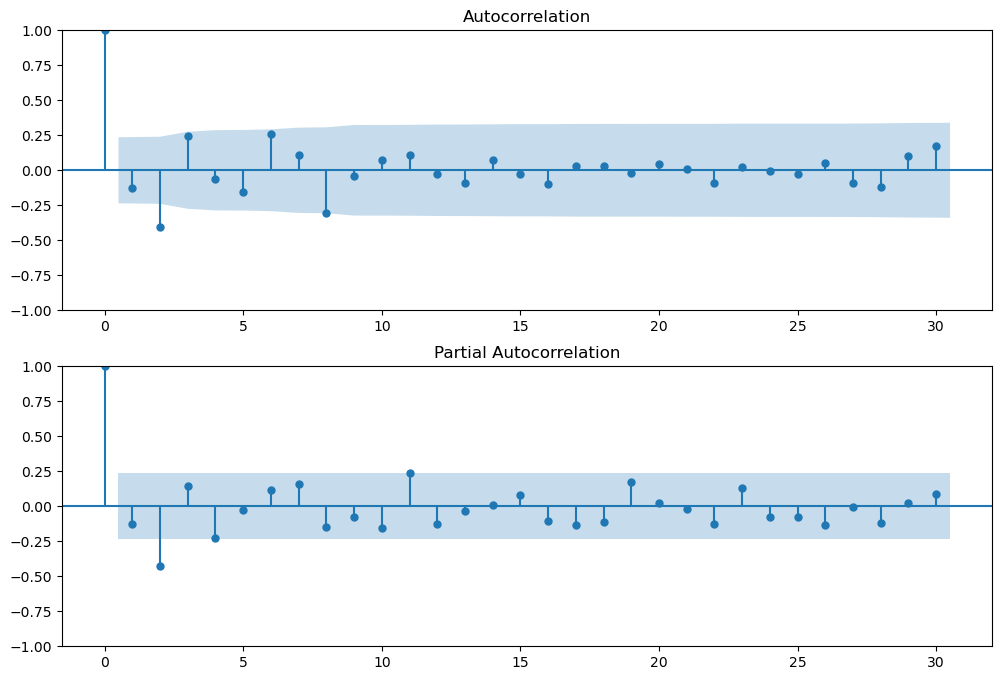

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[3:], lags= 30, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[3:], lags= 30, ax = ax2)

In [21]:
#for non seasonal data
from statsmodels.tsa.arima.model import ARIMA

In [22]:
model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()

C:\Users\VMUKITA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VMUKITA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VMUKITA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -512.040
Date:                Wed, 08 Nov 2023   AIC                           1030.081
Time:                        09:29:02   BIC                           1036.869
Sample:                    10-01-2017   HQIC                          1032.780
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3815      0.117     -3.272      0.001      -0.610      -0.153
ma.L1         -0.5684      0.116     -4.909      0.000      -0.795      -0.341
sigma2      1.053e+05   9073.691     11.604      0.000    8.75e+04    1.23e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               781.61
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               5.89   Skew:                            -2.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Months'>

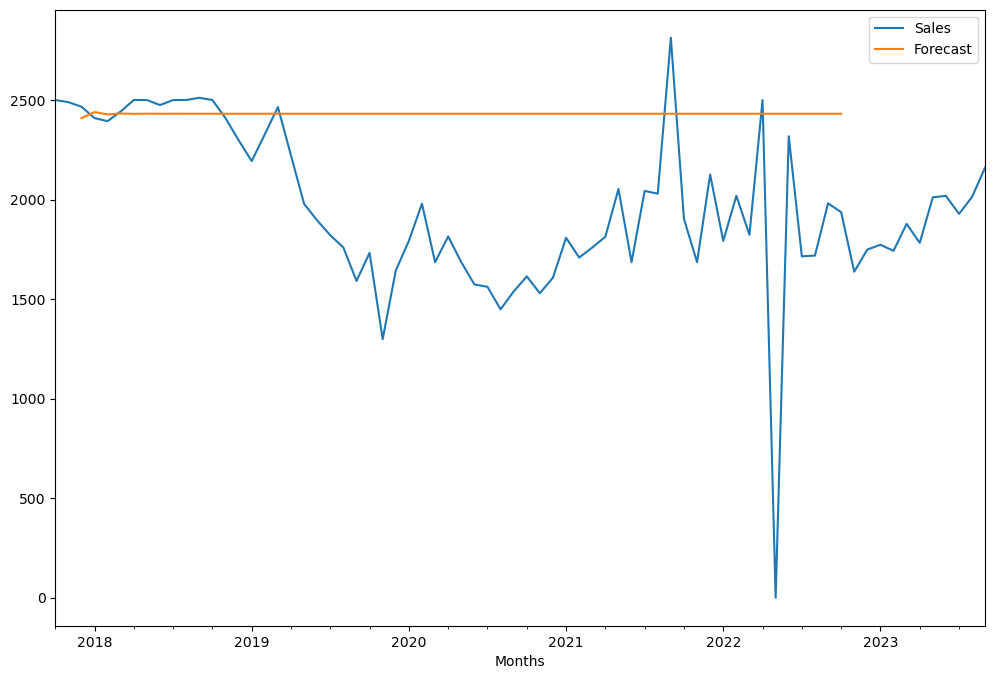

In [24]:
df['Forecast'] = model_fit.predict(start = 2, end = 60, dynamic= True)
df[['Sales', 'Forecast']].plot(figsize=(12,8))

In [25]:
import statsmodels.api as sm

In [26]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 3))
results=model.fit()

C:\Users\VMUKITA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\VMUKITA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Months'>

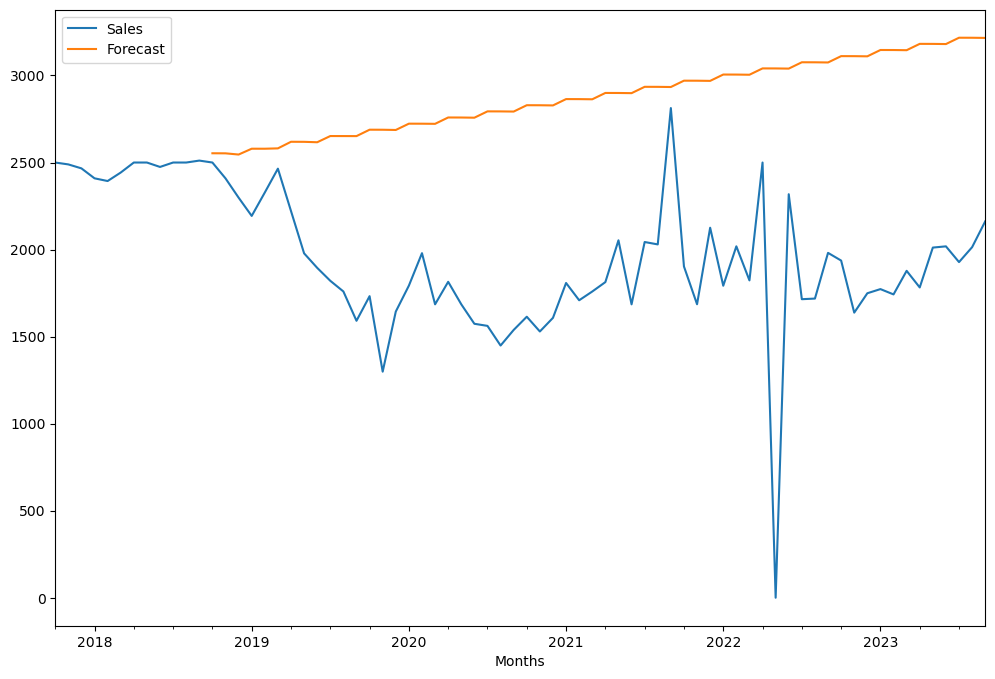

In [27]:
df['Forecast'] = results.predict(start=12, end=72, dynamic=True)
df[['Sales', 'Forecast']].plot(figsize=(12,8))